In [1]:
#coding:utf-8

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#载入数据
data_train = pd.read_csv('./data/train_data.csv')
data_train['Type'] = 'Train'
data_test = pd.read_csv('./data/test_a.csv')
data_test['Type'] = 'Test'
data_all = pd.concat([data_train, data_test], ignore_index=True)
data_train.head(5)

G:\Program Files\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,...,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney,Type
0,100309852,68.06,未知方式,2室1厅1卫,低,16,暂无数据,其他,XQ00051,SH,...,0.0000,28248,614,111546,1124.0,284.0,0,2018/11/28,2000.0,Train
1,100307942,125.55,未知方式,3室2厅2卫,中,14,暂无数据,简装,XQ00130,SH,...,0.0000,14823,148,157552,701.0,22.0,1,2018/12/16,2000.0,Train
2,100307764,132.00,未知方式,3室2厅2卫,低,32,暂无数据,其他,XQ00179,SH,...,0.0000,77645,520,131744,57.0,20.0,1,2018/12/22,16000.0,Train
3,100306518,57.00,未知方式,1室1厅1卫,中,17,暂无数据,精装,XQ00313,SH,...,3080.0331,8750,1665,253337,888.0,279.0,9,2018/12/21,1600.0,Train
4,100305262,129.00,未知方式,3室2厅3卫,低,2,暂无数据,毛坯,XQ01257,SH,...,0.0000,800,117,125309,2038.0,480.0,0,2018/11/18,2900.0,Train


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41440 entries, 0 to 41439
Data columns (total 52 columns):
ID                    41440 non-null int64
area                  41440 non-null float64
rentType              41440 non-null object
houseType             41440 non-null object
houseFloor            41440 non-null object
totalFloor            41440 non-null int64
houseToward           41440 non-null object
houseDecoration       41440 non-null object
communityName         41440 non-null object
city                  41440 non-null object
region                41440 non-null object
plate                 41440 non-null object
buildYear             41440 non-null object
saleSecHouseNum       41440 non-null int64
subwayStationNum      41440 non-null int64
busStationNum         41440 non-null int64
interSchoolNum        41440 non-null int64
schoolNum             41440 non-null int64
privateSchoolNum      41440 non-null int64
hospitalNum           41440 non-null int64
drugStoreNum       

In [4]:
data_train.describe()

,ID,area,totalFloor,saleSecHouseNum,subwayStationNum,busStationNum,interSchoolNum,schoolNum,privateSchoolNum,hospitalNum,...,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeMoney
count,4.144000e+04,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,...,41440.000000,4.144000e+04,41440.000000,41440.000000,41440.000000,41440.000000,41422.000000,41422.000000,41440.000000,4.144000e+04
mean,1.001221e+08,70.959409,11.413152,1.338538,5.741192,187.197153,1.506395,48.228813,6.271911,4.308736,...,12621.406425,1.045363e+08,724.763918,77250.235497,1137.132095,294514.059459,26945.663512,3089.077085,0.396260,8.837074e+03
std,9.376566e+04,88.119569,7.375203,3.180349,4.604929,179.674625,1.687631,29.568448,4.946457,3.359714,...,49853.120341,5.215216e+08,3224.303831,132052.508523,7667.381627,196745.147181,32174.637924,2954.706517,1.653932,5.514287e+05
min,1.000000e+08,1.000000,0.000000,0.000000,0.000000,24.000000,0.000000,9.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,600.000000,0.000000,49330.000000,17.000000,6.000000,0.000000,0.000000e+00
25%,1.000470e+08,42.607500,6.000000,0.000000,2.000000,74.000000,0.000000,24.000000,2.000000,1.000000,...,0.000000,0.000000e+00,0.000000,13983.000000,0.000000,165293.000000,7928.000000,1053.000000,0.000000,2.800000e+03
50%,1.000960e+08,65.000000,7.000000,0.000000,5.000000,128.000000,1.000000,47.000000,5.000000,4.000000,...,0.000000,0.000000e+00,0.000000,38947.000000,0.000000,245872.000000,20196.000000,2375.000000,0.000000,4.000000e+03
75%,1.001902e+08,90.000000,16.000000,1.000000,7.000000,258.000000,3.000000,61.000000,9.000000,6.000000,...,0.000000,0.000000e+00,0.000000,76668.000000,0.000000,330610.000000,34485.000000,4233.000000,0.000000,5.500000e+03
max,1.003218e+08,15055.000000,88.000000,52.000000,22.000000,824.000000,8.000000,142.000000,24.000000,14.000000,...,555508.010000,6.197570e+09,37513.062490,855400.000000,143700.000000,928198.000000,621864.000000,39876.000000,37.000000,1.000000e+08


In [5]:
# 缺失值分析
def missing_values(df):
    alldata_na = pd.DataFrame(df.isnull().sum(), columns={'missingNum'})  #统计每个字段缺失值个数
    alldata_na['existNum'] = len(df) - alldata_na['missingNum']           
    alldata_na['sum'] = len(df)
    alldata_na['missingRatio'] = alldata_na['missingNum']/len(df)*100    #缺失百分比
    alldata_na['dtype'] = df.dtypes
    #ascending：默认True升序排列；False降序排列
    alldata_na = alldata_na[alldata_na['missingNum']>0].reset_index().sort_values(by=['missingNum','index'],ascending=[False,True])
    # set_index函数会将其⼀个或多个列转换为⾏索引
    alldata_na.set_index('index',inplace=True)
    return alldata_na

missing_values(data_train)

,missingNum,existNum,sum,missingRatio,dtype
index,,,,,
pv,18,41422,41440,0.043436,float64
uv,18,41422,41440,0.043436,float64


In [6]:
#是否有单调特征列(单调的特征列很大可能是时间)
def incresing(vals):
    cnt = 0
    len_ = len(vals)
    for i in range(len_-1):
        if vals[i+1] > vals[i]:
            cnt += 1
    return cnt

fea_cols = [col for col in data_train.columns]
for col in fea_cols:
    cnt = incresing(data_train[col].values)
    #shape[0]计算行数，shape[1]计算列数
    if cnt / data_train.shape[0] >= 0.55:
        print('单调特征：',col)
        print('单调特征值个数：', cnt)
        print('单调特征值比例：', cnt / data_train.shape[0])

单调特征： tradeTime
单调特征值个数： 24085
单调特征值比例： 0.5812017374517374


In [7]:
#类别特征与数值特征
categorical_feas = ['rentType', 'houseType', 'houseFloor', 'region', 'plate', 'houseToward', 'houseDecoration',
    'communityName','city','buildYear']
numerical_feas=['ID','area','totalFloor','saleSecHouseNum','subwayStationNum',
    'busStationNum','interSchoolNum','schoolNum','privateSchoolNum','hospitalNum',
    'drugStoreNum','gymNum','bankNum','shopNum','parkNum','mallNum','superMarketNum',
    'totalTradeMoney','totalTradeArea','tradeMeanPrice','tradeSecNum','totalNewTradeMoney',
    'totalNewTradeArea','tradeNewMeanPrice','tradeNewNum','remainNewNum','supplyNewNum',
    'supplyLandNum','supplyLandArea','tradeLandNum','tradeLandArea','landTotalPrice',
    'landMeanPrice','totalWorkers','newWorkers','residentPopulation','pv','uv','lookNum']


rentType的特征分布如下：
未知方式    30759
整租       5472
合租       5204
--          5
Name: rentType, dtype: int64


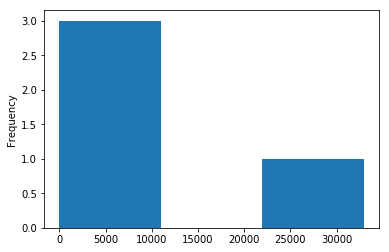

houseType的特征分布如下：
1室1厅1卫    9805
2室1厅1卫    8512
2室2厅1卫    6783
3室1厅1卫    3992
3室2厅2卫    2737
4室1厅1卫    1957
3室2厅1卫    1920
1室0厅1卫    1286
1室2厅1卫     933
2室2厅2卫     881
4室2厅2卫     435
2室0厅1卫     419
4室2厅3卫     273
5室1厅1卫     197
2室1厅2卫     155
3室2厅3卫     149
3室1厅2卫     135
1室0厅0卫      86
6室1厅1卫      65
4室2厅4卫      62
5室2厅3卫      54
4室2厅1卫      40
1室1厅2卫      39
4室3厅3卫      34
4室3厅4卫      34
5室2厅2卫      33
5室2厅4卫      30
5室3厅3卫      30
4室1厅2卫      20
5室3厅4卫      20
          ... 
6室2厅6卫       1
5室2厅6卫       1
5室1厅5卫       1
8室4厅4卫       1
8室2厅3卫       1
6室4厅4卫       1
3室0厅0卫       1
7室1厅3卫       1
2室1厅3卫       1
4室0厅2卫       1
3室4厅4卫       1
6室2厅5卫       1
6室1厅4卫       1
0室0厅1卫       1
6室4厅2卫       1
8室3厅4卫       1
9室3厅8卫       1
4室4厅2卫       1
4室1厅4卫       1
5室4厅2卫       1
5室4厅5卫       1
5室5厅4卫       1
7室4厅3卫       1
3室1厅0卫       1
9室2厅5卫       1
3室2厅5卫       1
7室1厅7卫       1
5室1厅3卫       1
6室4厅5卫       1
8室2厅4卫       1
Name: houseType, Length: 104, dtype: int64


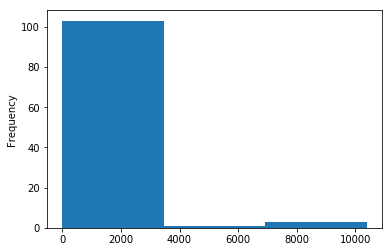

houseFloor的特征分布如下：
中    15458
高    14066
低    11916
Name: houseFloor, dtype: int64


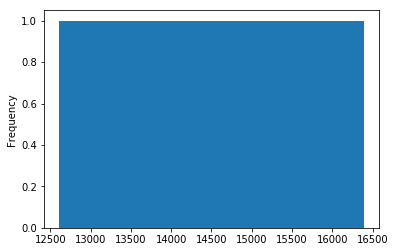

region的特征分布如下：
RG00002    11437
RG00005     5739
RG00003     4186
RG00010     3640
RG00012     3368
RG00004     3333
RG00006     1961
RG00007     1610
RG00008     1250
RG00013     1215
RG00001     1157
RG00014     1069
RG00011      793
RG00009      681
RG00015        1
Name: region, dtype: int64


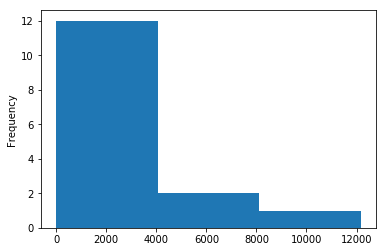

plate的特征分布如下：
BK00031    1958
BK00033    1837
BK00045    1816
BK00055    1566
BK00056    1516
BK00052    1375
BK00017    1305
BK00041    1266
BK00054    1256
BK00051    1253
BK00046    1227
BK00035    1156
BK00042    1137
BK00009    1016
BK00050     979
BK00043     930
BK00026     906
BK00047     880
BK00034     849
BK00013     834
BK00053     819
BK00028     745
BK00040     679
BK00060     671
BK00010     651
BK00029     646
BK00062     618
BK00022     614
BK00018     613
BK00064     590
           ... 
BK00037     444
BK00012     412
BK00038     398
BK00024     397
BK00020     384
BK00002     357
BK00065     348
BK00027     344
BK00039     343
BK00063     281
BK00057     278
BK00015     253
BK00006     231
BK00021     226
BK00007     225
BK00066     219
BK00030     219
BK00049     211
BK00008     210
BK00004     189
BK00048     165
BK00025     157
BK00023     127
BK00059     122
BK00044      98
BK00016      40
BK00036      33
BK00058      15
BK00032       3
BK00001       1
Name: plat

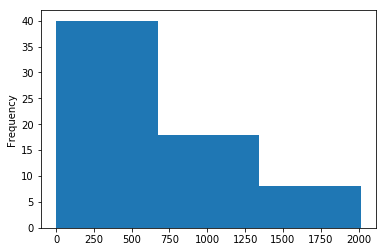

houseToward的特征分布如下：
南       34377
南北       2254
北        2043
暂无数据      963
东南        655
东         552
西         264
西南        250
西北         58
东西         24
Name: houseToward, dtype: int64


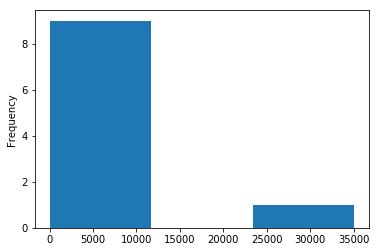

houseDecoration的特征分布如下：
其他    29040
精装    10918
简装     1171
毛坯      311
Name: houseDecoration, dtype: int64


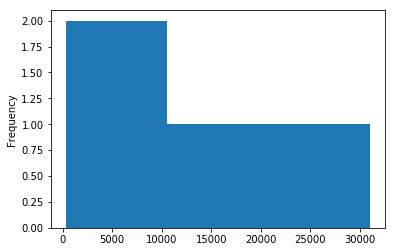

communityName的特征分布如下：
XQ01834    358
XQ01274    192
XQ02273    188
XQ03110    185
XQ02337    173
XQ01389    166
XQ01658    163
XQ02789    152
XQ00530    151
XQ01561    151
XQ01339    132
XQ00826    122
XQ01873    122
XQ02296    121
XQ01232    119
XQ01401    118
XQ02441    117
XQ00196    115
XQ02365    109
XQ01207    109
XQ01410    108
XQ00852    105
XQ01672    103
XQ02072    103
XQ01642     99
XQ01634     99
XQ01375     99
XQ01970     96
XQ00210     93
XQ01413     92
          ... 
XQ00231      1
XQ00994      1
XQ01816      1
XQ00390      1
XQ00023      1
XQ02965      1
XQ02716      1
XQ01730      1
XQ00097      1
XQ01787      1
XQ01304      1
XQ02593      1
XQ03874      1
XQ03382      1
XQ02738      1
XQ00957      1
XQ02414      1
XQ02162      1
XQ02940      1
XQ02515      1
XQ03345      1
XQ01717      1
XQ02191      1
XQ02954      1
XQ00731      1
XQ03887      1
XQ00020      1
XQ01822      1
XQ02323      1
XQ03975      1
Name: communityName, Length: 4236, dtype: int64
city的特征分布如下：
SH

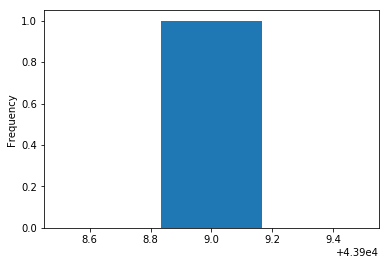

buildYear的特征分布如下：
1994    2851
暂无信息    2808
2006    2007
2007    1851
2008    1849
2005    1814
2010    1774
1995    1685
1993    1543
2011    1498
2004    1431
2009    1271
2014    1238
2003    1156
1997    1125
2002    1120
2012    1049
1996     991
2000     925
2001     898
2015     840
1999     822
1998     733
2013     714
1987     632
1983     612
1991     545
1984     493
1980     452
1990     431
        ... 
1964      39
1960      33
1930      30
1973      23
1955      20
1932      19
2017      14
1952      12
1936      12
1931      11
1968      10
1965       8
1967       7
1920       5
1937       5
1910       5
1963       4
1949       4
1940       4
1959       3
1912       3
1970       3
1969       3
1972       2
1939       2
1926       2
1961       2
1962       1
1951       1
1950       1
Name: buildYear, Length: 80, dtype: int64


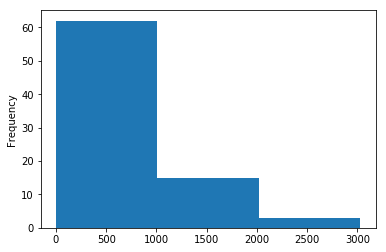

In [8]:
# 特征nunique分布
for feature in categorical_feas:
    print(feature + "的特征分布如下：")
    print(data_train[feature].value_counts())
    if feature != 'communityName': # communityName值太多，暂且不看图表
        data_all[feature].value_counts().plot.hist(bins=3)
        plt.show()

In [9]:
print(data_train['communityName'].value_counts())
print(data_test['communityName'].value_counts())

XQ01834    358
XQ01274    192
XQ02273    188
XQ03110    185
XQ02337    173
XQ01389    166
XQ01658    163
XQ02789    152
XQ00530    151
XQ01561    151
XQ01339    132
XQ00826    122
XQ01873    122
XQ02296    121
XQ01232    119
XQ01401    118
XQ02441    117
XQ00196    115
XQ02365    109
XQ01207    109
XQ01410    108
XQ00852    105
XQ01672    103
XQ02072    103
XQ01642     99
XQ01634     99
XQ01375     99
XQ01970     96
XQ00210     93
XQ01413     92
          ... 
XQ00231      1
XQ00994      1
XQ01816      1
XQ00390      1
XQ00023      1
XQ02965      1
XQ02716      1
XQ01730      1
XQ00097      1
XQ01787      1
XQ01304      1
XQ02593      1
XQ03874      1
XQ03382      1
XQ02738      1
XQ00957      1
XQ02414      1
XQ02162      1
XQ02940      1
XQ02515      1
XQ03345      1
XQ01717      1
XQ02191      1
XQ02954      1
XQ00731      1
XQ03887      1
XQ00020      1
XQ01822      1
XQ02323      1
XQ03975      1
Name: communityName, Length: 4236, dtype: int64
XQ03927    1
XQ01018    1
XQ01237    

In [10]:
# 统计特征值出现频次大于100的特征
for feature in categorical_feas:
    df_value_counts = pd.DataFrame(data_train[feature].value_counts())
    df_value_counts = df_value_counts.reset_index()
    df_value_counts.columns = [feature, 'counts'] # change column names
    print(df_value_counts[df_value_counts['counts'] >= 100])


  rentType  counts
0     未知方式   30759
1       整租    5472
2       合租    5204
   houseType  counts
0     1室1厅1卫    9805
1     2室1厅1卫    8512
2     2室2厅1卫    6783
3     3室1厅1卫    3992
4     3室2厅2卫    2737
5     4室1厅1卫    1957
6     3室2厅1卫    1920
7     1室0厅1卫    1286
8     1室2厅1卫     933
9     2室2厅2卫     881
10    4室2厅2卫     435
11    2室0厅1卫     419
12    4室2厅3卫     273
13    5室1厅1卫     197
14    2室1厅2卫     155
15    3室2厅3卫     149
16    3室1厅2卫     135
  houseFloor  counts
0          中   15458
1          高   14066
2          低   11916
     region  counts
0   RG00002   11437
1   RG00005    5739
2   RG00003    4186
3   RG00010    3640
4   RG00012    3368
5   RG00004    3333
6   RG00006    1961
7   RG00007    1610
8   RG00008    1250
9   RG00013    1215
10  RG00001    1157
11  RG00014    1069
12  RG00011     793
13  RG00009     681
      plate  counts
0   BK00031    1958
1   BK00033    1837
2   BK00045    1816
3   BK00055    1566
4   BK00056    1516
5   BK00052    1375
6   BK00017    1305
7 

G:\Program Files\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


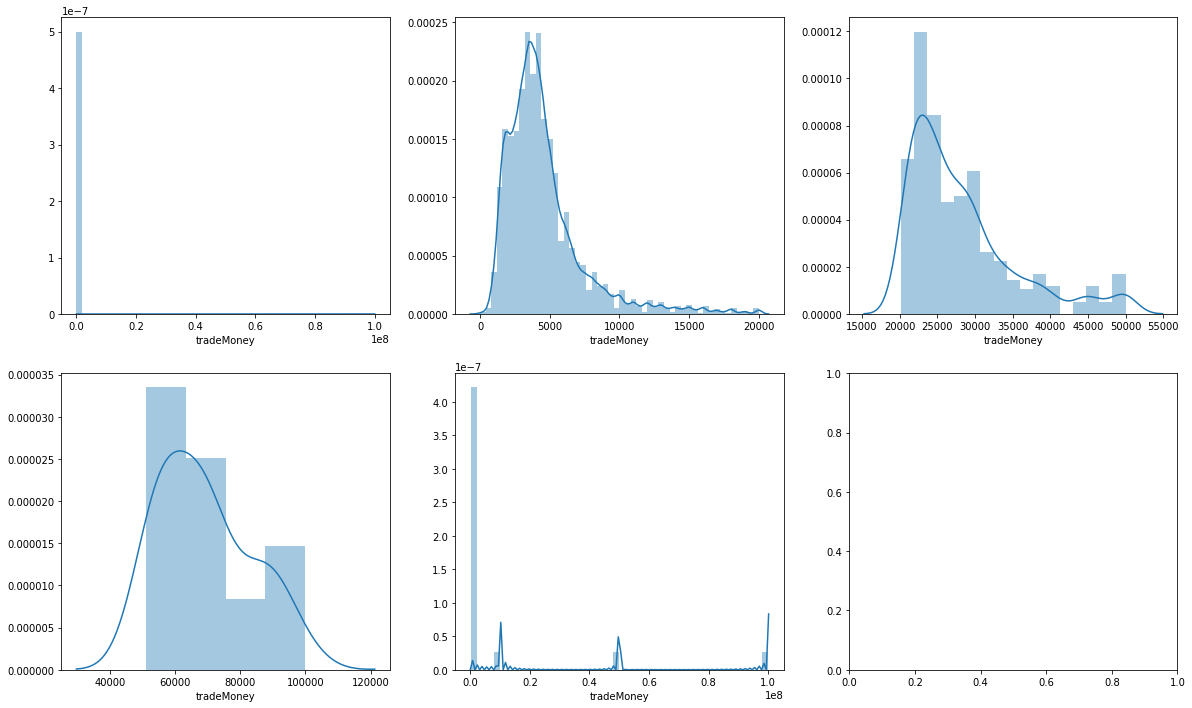

In [11]:
# Label分布
fig,axes = plt.subplots(2,3,figsize=(20,5))
fig.set_size_inches(20,12)
sns.distplot(data_train['tradeMoney'],ax=axes[0][0])
sns.distplot(data_train[(data_train['tradeMoney']<=20000)]['tradeMoney'],ax=axes[0][1])
sns.distplot(data_train[(data_train['tradeMoney']>20000)&(data_train['tradeMoney']<=50000)]['tradeMoney'],ax=axes[0][2])
sns.distplot(data_train[(data_train['tradeMoney']>50000)&(data_train['tradeMoney']<=100000)]['tradeMoney'],ax=axes[1][0])
sns.distplot(data_train[(data_train['tradeMoney']>100000)]['tradeMoney'],ax=axes[1][1])

In [12]:
#不同的特征值的样本的label的分布
print("money<=10000",len(data_train[(data_train['tradeMoney']<=10000)]['tradeMoney']))
print("10000<money<=20000",len(data_train[(data_train['tradeMoney']>10000)&(data_train['tradeMoney']<=20000)]['tradeMoney']))
print("20000<money<=50000",len(data_train[(data_train['tradeMoney']>20000)&(data_train['tradeMoney']<=50000)]['tradeMoney']))
print("50000<money<=100000",len(data_train[(data_train['tradeMoney']>50000)&(data_train['tradeMoney']<=100000)]['tradeMoney']))
print("100000<money",len(data_train[(data_train['tradeMoney']>100000)]['tradeMoney']))


money<=10000 38964
10000<money<=20000 1985
20000<money<=50000 433
50000<money<=100000 39
100000<money 19
